# Overview of problem
You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). Your project has been divided into three parts where you'll explore a recent marketing dataset by performing various unsupervised learning techniques and later providing recommendations based on your insights.

In [1]:
# loading dataset
ds1 <- read.csv("Supermarket 1 and 2.csv")
head(ds1)

Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


In [2]:
# getting the shape of our dataset
dim(ds1)

[1] 1000   16

In [3]:
# getting basic information about our dataset
str(ds1)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3

"Invoice.ID" does not seem to be relevant to our problem so we will drop it. As for "Date" and "Time", we will split them into day, month, and year, and hour and minute respectively.

In [4]:
# dropping the "Invoice.ID" column
ds1$Invoice.ID <- NULL

In [5]:
# splitting the Date column into Day, Month, and Year columns, and storing the results as factors
ds1$Day <- as.factor(format(as.POSIXct(ds1$Date, format="%m/%d/%Y"), "%d"))
ds1$Month <- as.factor(format(as.POSIXct(ds1$Date, format="%m/%d/%Y"), "%m"))
ds1$Year <- as.factor(format(as.POSIXct(ds1$Date, format="%m/%d/%Y"), "%Y"))

# splitting the Time variable into Hour and Minute, and storing the results as factors
ds1$Hour <- as.factor(format(as.POSIXct(ds1$Time, format="%H:%M"), "%H"))
ds1$Minute <- as.factor(format(as.POSIXct(ds1$Time, format="%H:%M"), "%M"))

# dropping "Date" and "Time" since they are no longer useful
ds1$Date <- NULL
ds1$Time <- NULL

# previewing our modified dataset
head(ds1)

# previewing the dimensions of our modified dataset
dim(ds1)

Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total,Day,Month,Year,Hour,Minute
A,Member,Female,Health and beauty,74.69,7,26.1415,Ewallet,522.83,4.761905,26.1415,9.1,548.9715,05,01,2019,13,08
C,Normal,Female,Electronic accessories,15.28,5,3.8200,Cash,76.40,4.761905,3.8200,9.6,80.2200,08,03,2019,10,29
A,Normal,Male,Home and lifestyle,46.33,7,16.2155,Credit card,324.31,4.761905,16.2155,7.4,340.5255,03,03,2019,13,23
A,Member,Male,Health and beauty,58.22,8,23.2880,Ewallet,465.76,4.761905,23.2880,8.4,489.0480,27,01,2019,20,33
A,Normal,Male,Sports and travel,86.31,7,30.2085,Ewallet,604.17,4.761905,30.2085,5.3,634.3785,08,02,2019,10,37
C,Normal,Male,Electronic accessories,85.39,7,29.8865,Ewallet,597.73,4.761905,29.8865,4.1,627.6165,25,03,2019,18,30


[1] 1000   18

We are now up to 18 variables, but the number of records hasn't changed.

In [6]:
# checking for duplicated records
anyDuplicated(ds1)

[1] 0

There are no duplicated records.

In [7]:
# checking for missing values
colSums(is.na(ds1))

Branch           Customer.type                  Gender 
                      0                       0                       0 
           Product.line              Unit.price                Quantity 
                      0                       0                       0 
                    Tax                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total                     Day                   Month 
                      0                       0                       0 
                   Year                    Hour                  Minute 
                      0                       0                       0

There are no missing values.

In [9]:
# turning all variables numeric
df_num <- ds1
df_num$Branch <- as.numeric(ds1$Branch)
df_num$Customer.type <- as.numeric(ds1$Customer.type)
df_num$Gender <- as.numeric(ds1$Gender)
df_num$Product.line <- as.numeric(ds1$Product.line)
df_num$Payment <- as.numeric(ds1$Payment)
df_num$Day <- as.numeric(ds1$Day)
df_num$Month <- as.numeric(ds1$Month)
df_num$Hour <- as.numeric(ds1$Hour)
df_num$Minute <- as.numeric(ds1$Minute)

# removing unnecessary variables
df_num$gross.margin.percentage <- NULL
df_num$Year <- NULL

# previewing our new dataset's class types
str(df_num)

'data.frame':	1000 obs. of  16 variables:
 $ Branch       : num  1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type: num  1 2 2 1 2 2 1 2 1 1 ...
 $ Gender       : num  1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line : num  4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price   : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity     : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax          : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Payment      : num  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs         : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross.income : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Rating       : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $ Total        : num  549 80.2 340.5 489 634.4 ...
 $ Day          : num  5 8 3 27 8 25 25 24 10 20 ...
 $ Month        : num  1 3 3 1 2 3 2 2 1 2 ...
 $ Hour         : num  4 1 4 11 1 9 5 2 8 4 ...
 $ Minute       : num  9 30 24 34 38 31 37 39 16 28 ...


## Part 1: Dimensionality Reduction
This section of the project entails reducing your dataset to a low dimensional dataset using the t-SNE algorithm or PCA. You will be required to perform your analysis and provide insights gained from your analysis.

### 1.1 Principal Component Analysis (PCA)

In [10]:
# now carrying out PCA with center and scale set to true
df_num.pca <- prcomp(df_num, center = TRUE, scale. = TRUE)

# previewing our PCA summary
summary(df_num.pca)

Importance of components:
                          PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     2.2205 1.0874 1.08282 1.05002 1.02123 1.01763 0.99088
Proportion of Variance 0.3081 0.0739 0.07328 0.06891 0.06518 0.06472 0.06136
Cumulative Proportion  0.3081 0.3821 0.45533 0.52424 0.58942 0.65414 0.71551
                          PC8    PC9    PC10    PC11    PC12   PC13      PC14
Standard deviation     0.9757 0.9641 0.95863 0.92025 0.90270 0.2994 2.718e-16
Proportion of Variance 0.0595 0.0581 0.05744 0.05293 0.05093 0.0056 0.000e+00
Cumulative Proportion  0.7750 0.8331 0.89054 0.94347 0.99440 1.0000 1.000e+00
                          PC15      PC16
Standard deviation     1.8e-16 9.964e-17
Proportion of Variance 0.0e+00 0.000e+00
Cumulative Proportion  1.0e+00 1.000e+00

PC1 describes 30.81% of the total variation of the dataset, PC2 describes 7.39%, and so on.

In [12]:
str(df_num.pca)

List of 5
 $ sdev    : num [1:16] 2.22 1.09 1.08 1.05 1.02 ...
 $ rotation: num [1:16, 1:16] 0.0224 -0.0125 -0.0283 0.0174 0.2911 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:16] "Branch" "Customer.type" "Gender" "Product.line" ...
  .. ..$ : chr [1:16] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:16] 1.99 1.5 1.5 3.45 55.67 ...
  ..- attr(*, "names")= chr [1:16] "Branch" "Customer.type" "Gender" "Product.line" ...
 $ scale   : Named num [1:16] 0.818 0.5 0.5 1.715 26.495 ...
  ..- attr(*, "names")= chr [1:16] "Branch" "Customer.type" "Gender" "Product.line" ...
 $ x       : num [1:1000, 1:16] 2.05 -2.287 0.126 1.466 2.743 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:16] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [130]:
# loading libraries to plot our PCA

library(devtools)
library(usethis)

install_github("vqv/ggbiplot")

Loading required package: usethis


ERROR: Error: Failed to install 'unknown package' from GitHub:
  Could not resolve host: api.github.com


In [129]:
library(ggbiplot)
ggbiplot(df_num.pca)

ERROR: Error in library(ggbiplot): there is no package called ‘ggbiplot’


In [ ]:
# adding more detail to the plot
ggbiplot(df_num.pca, labels = rownames(df_num), obs.scale = 1, var.scale = 1)

### 1.2 t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [13]:
# loading Rtsne library
library(Rtsne)

In [23]:
# making a copy of the dataset where we use Branch as a factor
df_branch <- df_num
df_branch$Branch <- as.factor(df_branch$Branch)

In [24]:
# for plotting
colors = rainbow(length(unique(df_branch$Branch)))
names(colors) = unique(df_branch$Branch)

In [25]:
# executing the algorithm on curated data
tsne <- Rtsne(df_branch[, -1], dims = 2, perplexity = 30, verbose = TRUE,
             max_iter = 500)
        

Performing PCA
Read the 1000 x 15 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.28 seconds (sparsity = 0.101692)!
Learning embedding...
Iteration 50: error is 61.286749 (50 iterations in 0.14 seconds)
Iteration 100: error is 54.388567 (50 iterations in 0.11 seconds)
Iteration 150: error is 53.020941 (50 iterations in 0.11 seconds)
Iteration 200: error is 52.489381 (50 iterations in 0.13 seconds)
Iteration 250: error is 52.211707 (50 iterations in 0.14 seconds)
Iteration 300: error is 0.723904 (50 iterations in 0.13 seconds)
Iteration 350: error is 0.556650 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.514303 (50 iterations in 0.12 seconds)
Iteration 450: error is 0.496497 (50 iterations in 0.11 seconds)
Iteration 500: error is 0.481660 (50 iterations in 0.10 seconds)
Fitting performed in 1.19 seconds.


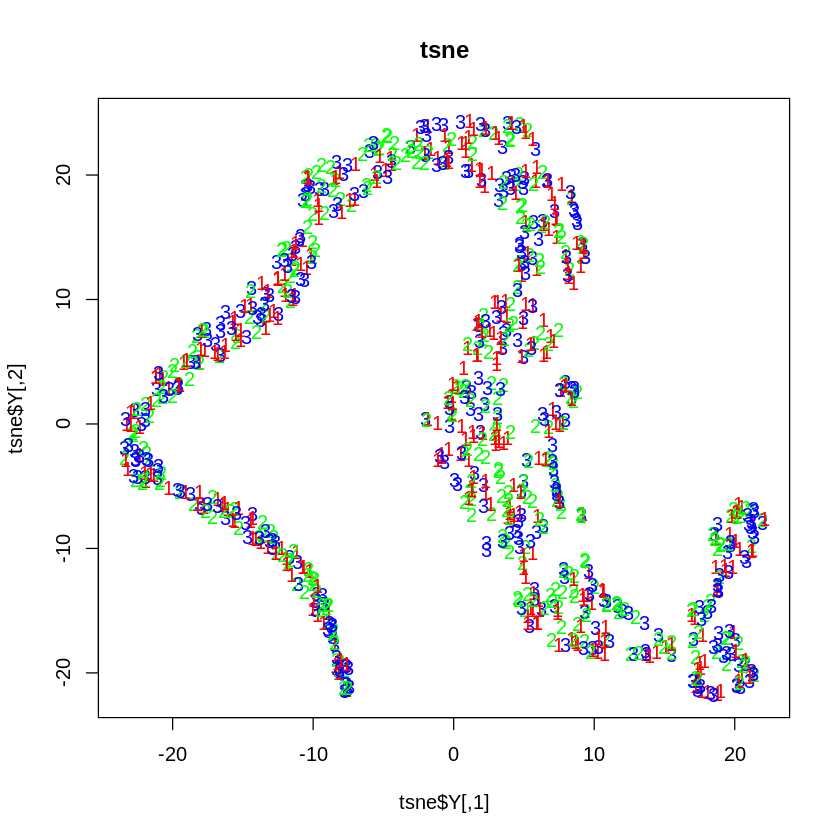

In [26]:
# plotting our graph
plot(tsne$Y, t = 'n', main = 'tsne')
text(tsne$Y, labels = df_branch$Branch,
col = colors[df_branch$Branch])

Performing PCA
Read the 1000 x 15 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.25 seconds (sparsity = 0.101688)!
Learning embedding...
Iteration 50: error is 59.913410 (50 iterations in 0.13 seconds)
Iteration 100: error is 53.131994 (50 iterations in 0.10 seconds)
Iteration 150: error is 52.298870 (50 iterations in 0.10 seconds)
Iteration 200: error is 52.093061 (50 iterations in 0.11 seconds)
Iteration 250: error is 51.970123 (50 iterations in 0.11 seconds)
Iteration 300: error is 0.716346 (50 iterations in 0.10 seconds)
Iteration 350: error is 0.553952 (50 iterations in 0.10 seconds)
Iteration 400: error is 0.518124 (50 iterations in 0.10 seconds)
Iteration 450: error is 0.502379 (50 iterations in 0.10 seconds)
Iteration 500: error is 0.491762 (50 iterations in 0.10 seconds)
Fitting performed in 1.04 seconds.


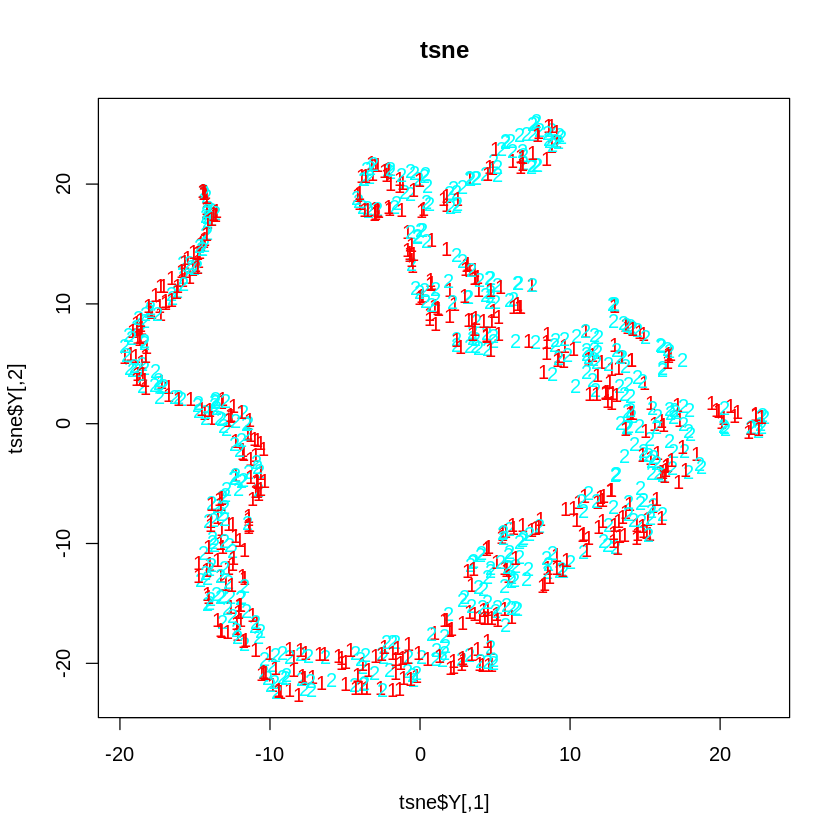

In [27]:
# attempting t-SNE with the Gender variable

# making a copy of the dataset where we use Gender as a factor
df_gender <- df_num
df_gender$Gender <- as.factor(df_gender$Gender)

# for plotting
colors = rainbow(length(unique(df_gender$Gender)))
names(colors) = unique(df_gender$Gender)

# executing the algorithm on curated data
tsne <- Rtsne(df_gender[, -3], dims = 2, perplexity = 30, verbose = TRUE,
             max_iter = 500)

# plotting our graph
plot(tsne$Y, t = 'n', main = 'tsne')
text(tsne$Y, labels = df_gender$Gender,
col = colors[df_gender$Gender])

Performing PCA
Read the 1000 x 15 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.27 seconds (sparsity = 0.101688)!
Learning embedding...
Iteration 50: error is 60.772540 (50 iterations in 0.12 seconds)
Iteration 100: error is 53.705060 (50 iterations in 0.10 seconds)
Iteration 150: error is 52.481392 (50 iterations in 0.10 seconds)
Iteration 200: error is 52.125730 (50 iterations in 0.11 seconds)
Iteration 250: error is 51.978932 (50 iterations in 0.11 seconds)
Iteration 300: error is 0.725544 (50 iterations in 0.12 seconds)
Iteration 350: error is 0.566356 (50 iterations in 0.12 seconds)
Iteration 400: error is 0.514271 (50 iterations in 0.13 seconds)
Iteration 450: error is 0.490469 (50 iterations in 0.14 seconds)
Iteration 500: error is 0.476449 (50 iterations in 0.12 seconds)
Fitting performed in 1.16 seconds.


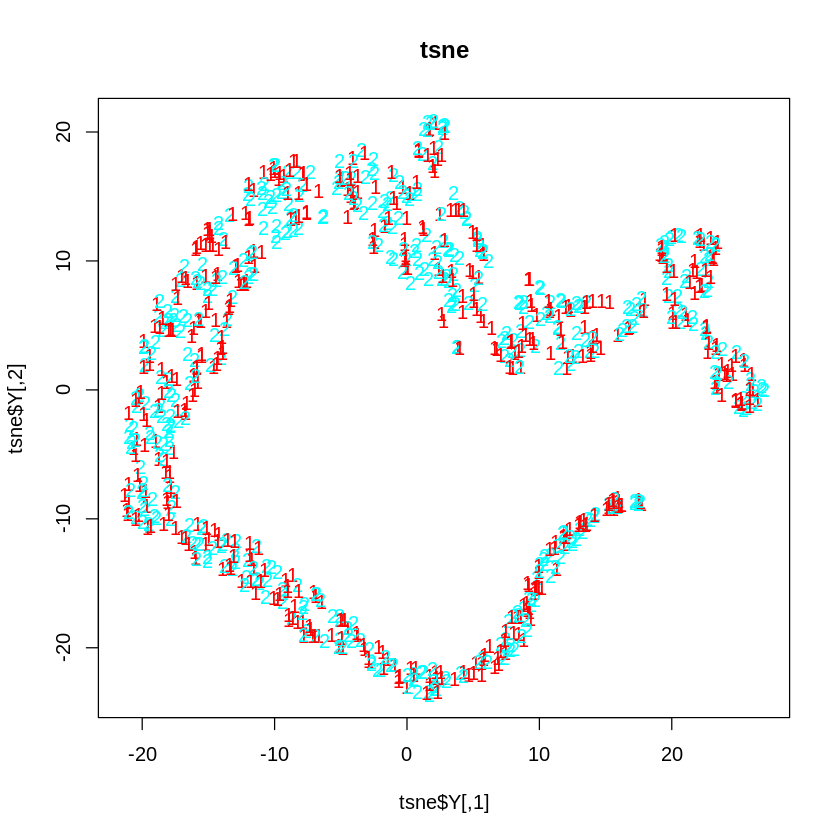

In [28]:
# attempting t-SNE with the Customer.type variable

# making a copy of the dataset 
df_cust <- df_num
df_cust$Customer.type <- as.factor(df_cust$Customer.type)

# for plotting
colors = rainbow(length(unique(df_cust$Customer.type)))
names(colors) = unique(df_cust$Customer.type)

# executing the algorithm on curated data
tsne <- Rtsne(df_cust[, -2], dims = 2, perplexity = 30, verbose = TRUE,
             max_iter = 500)

# plotting our graph
plot(tsne$Y, t = 'n', main = 'tsne')
text(tsne$Y, labels = df_cust$Customer.type,
col = colors[df_cust$Customer.type])

Performing PCA
Read the 1000 x 16 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.25 seconds (sparsity = 0.101694)!
Learning embedding...
Iteration 50: error is 61.105740 (50 iterations in 0.15 seconds)
Iteration 100: error is 54.157383 (50 iterations in 0.11 seconds)
Iteration 150: error is 52.913355 (50 iterations in 0.11 seconds)
Iteration 200: error is 52.430765 (50 iterations in 0.11 seconds)
Iteration 250: error is 52.143880 (50 iterations in 0.11 seconds)
Iteration 300: error is 0.708412 (50 iterations in 0.10 seconds)
Iteration 350: error is 0.556564 (50 iterations in 0.10 seconds)
Iteration 400: error is 0.512236 (50 iterations in 0.10 seconds)
Iteration 450: error is 0.497684 (50 iterations in 0.10 seconds)
Iteration 500: error is 0.487269 (50 iterations in 0.11 seconds)
Fitting performed in 1.11 seconds.


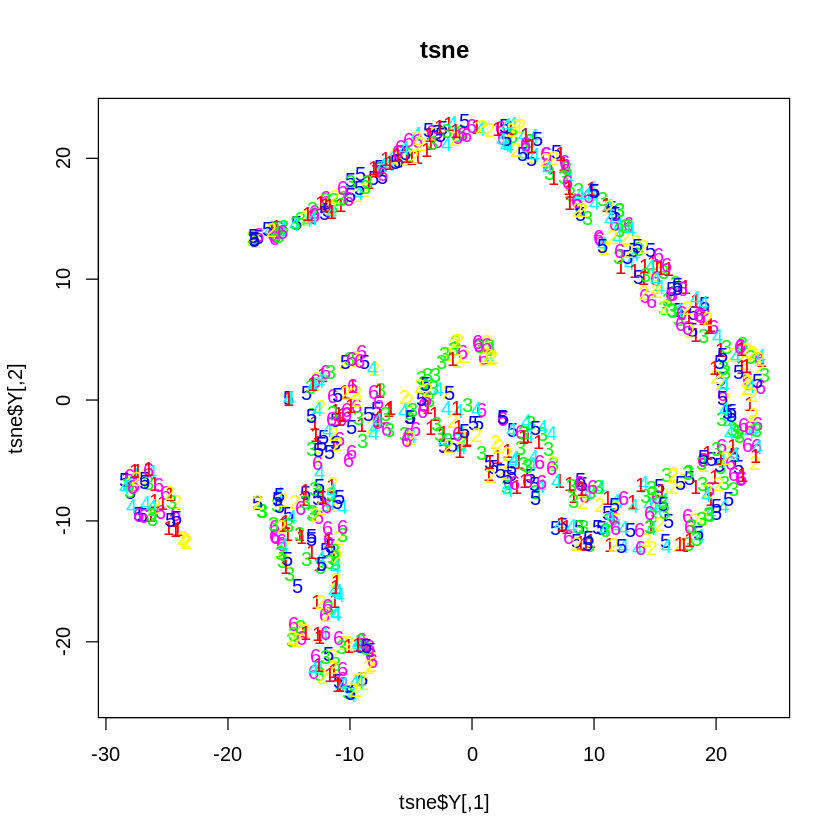

In [29]:
# finally attempting t-SNE with the Product.line variable

# making a copy of the dataset 
df_prod <- df_num
df_prod$Product.line <- as.factor(df_prod$Product.line)

# for plotting
colors = rainbow(length(unique(df_prod$Product.line)))
names(colors) = unique(df_prod$Product.line)

# executing the algorithm on curated data
tsne <- Rtsne(df_cust[, -4], dims = 2, perplexity = 30, verbose = TRUE,
             max_iter = 500)

# plotting our graph
plot(tsne$Y, t = 'n', main = 'tsne')
text(tsne$Y, labels = df_prod$Product.line,
col = colors[df_prod$Product.line])

## Part 2: Feature Selection
This section requires you to perform feature selection through the use of the unsupervised learning methods learned earlier this week. You will be required to perform your analysis and provide insights on the features that contribute the most information to the dataset.

### 2.1 Filter Method

In [132]:
library(caret)
library(corrplot)
library(lattice)

In [160]:
# finding correlations
correlationMatrix <- cor(df_num)
correlationMatrix

,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Payment,cogs,gross.income,Rating,Total,Day,Month,Hour,Minute
Branch,1.00000000,-0.019607869,-0.056317558,-0.053937557,0.028202440,0.015963788,0.04104666,-0.050104288,0.04104666,0.04104666,0.010238476,0.04104666,-0.013086533,-0.035300925,0.033007115,0.038378328
Customer.type,-0.01960787,1.000000000,0.039996160,-0.036800311,-0.020237875,-0.016762706,-0.01967028,0.018073436,-0.01967028,-0.01967028,0.018888672,-0.01967028,0.034124208,0.005972443,-0.018893298,-0.012909043
Gender,-0.05631756,0.039996160,1.000000000,0.005193197,0.015444630,-0.074258307,-0.04945099,0.044577609,-0.04945099,-0.04945099,0.004800208,-0.04945099,0.051156850,0.027533609,0.084081139,0.009257593
Product.line,-0.05393756,-0.036800311,0.005193197,1.000000000,0.019321028,0.020256001,0.03162072,0.029896383,0.03162072,0.03162072,-0.020528973,0.03162072,-0.050926658,-0.026433391,-0.060849916,0.018725704
Unit.price,0.02820244,-0.020237875,0.015444630,0.019321028,1.000000000,0.010777564,0.63396209,-0.015941048,0.63396209,0.63396209,-0.008777507,0.63396209,0.057020896,-0.027387186,0.008242210,-0.006868818
Quantity,0.01596379,-0.016762706,-0.074258307,0.020256001,0.010777564,1.000000000,0.70551019,-0.003920990,0.70551019,0.70551019,-0.015814905,0.70551019,-0.043346859,-0.014524276,-0.007316886,-0.014928556
Tax,0.04104666,-0.019670283,-0.049450989,0.031620725,0.633962089,0.705510186,1.00000000,-0.012433637,1.00000000,1.00000000,-0.036441705,1.00000000,-0.002514770,-0.022301340,-0.002770440,-0.027479899
Payment,-0.05010429,0.018073436,0.044577609,0.029896383,-0.015941048,-0.003920990,-0.01243364,1.000000000,-0.01243364,-0.01243364,-0.005381289,-0.01243364,-0.004333547,0.031757801,0.045420537,0.000421422
cogs,0.04104666,-0.019670283,-0.049450989,0.031620725,0.633962089,0.705510186,1.00000000,-0.012433637,1.00000000,1.00000000,-0.036441705,1.00000000,-0.002514770,-0.022301340,-0.002770440,-0.027479899
gross.income,0.04104666,-0.019670283,-0.049450989,0.031620725,0.633962089,0.705510186,1.00000000,-0.012433637,1.00000000,1.00000000,-0.036441705,1.00000000,-0.002514770,-0.022301340,-0.002770440,-0.027479899


In [162]:
# getting the highly correlated variables
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff = 0.75)
names(df_num[,highlyCorrelated])

[1] "cogs"  "Total" "Tax"

Here we see that 'cogs', 'Total', and 'Tax' are highly correlated with each other. We will now manually remove them.

In [164]:
# removing the redundant variables
filter_df_num <- df_num[-highlyCorrelated]
head(filter_df_num)

Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Payment,gross.income,Rating,Day,Month,Hour,Minute
1,1,1,4,74.69,7,3,26.1415,9.1,5,1,4,9
3,2,1,1,15.28,5,1,3.8200,9.6,8,3,1,30
1,2,2,5,46.33,7,2,16.2155,7.4,3,3,4,24
1,1,2,4,58.22,8,3,23.2880,8.4,27,1,11,34
1,2,2,6,86.31,7,3,30.2085,5.3,8,2,1,38
3,2,2,1,85.39,7,3,29.8865,4.1,25,3,9,31


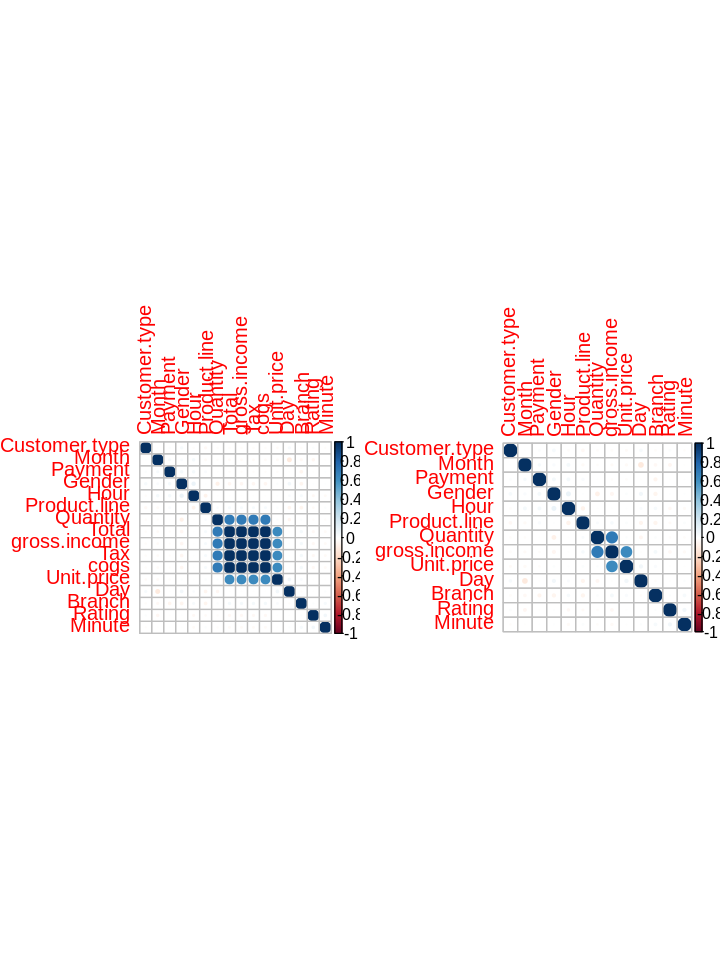

In [170]:
# visualizing
par(mfrow = c(1, 2))
set_plot(6, 8)

# correlation matrix plot of the original dataset
corrplot(correlationMatrix, order = "hclust")

# correlation matrix plot of the filtered dataset
corrplot(cor(filter_df_num), order = "hclust")

### 2.2 Wrapper Method

In [144]:
library(mclust)
library(clustvarsel)

In [174]:
# carrying out stepwise (forward/backward) greedy search

step = clustvarsel(df_num, G = 1:8)
step

------------------------------------------------------ 
Variable selection for Gaussian model-based clustering
Stepwise (forward/backward) greedy search
------------------------------------------------------ 

 Variable proposed Type of step  BICclust Model G   BICdiff Decision
      Product.line          Add -3498.098     E 5  431.9005 Accepted
             Month          Add -5459.333   VEI 3  529.4172 Accepted
           Payment          Add -8092.699   VEV 4 -154.1886 Rejected
             Month       Remove -3498.098     E 5  529.4172 Rejected

Selected subset: Product.line, Month

In [176]:
# The selection algorithm would indicate that the subset 
# we use for the clustering model is composed of variables X1 and X2 
# and that other variables should be rejected. 
# Having identified the variables that we use, we proceed to build the clustering model:
# ---
#

Subset1 = df_num[, step$subset]
mod = Mclust(Subset1, G = 1:8)
summary(mod)


---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEI (diagonal, equal shape) model with 3 components: 

 log-likelihood    n df       BIC       ICL
       -2688.22 1000 12 -5459.333 -5460.352

Clustering table:
  1   2   3 
223 648 129 

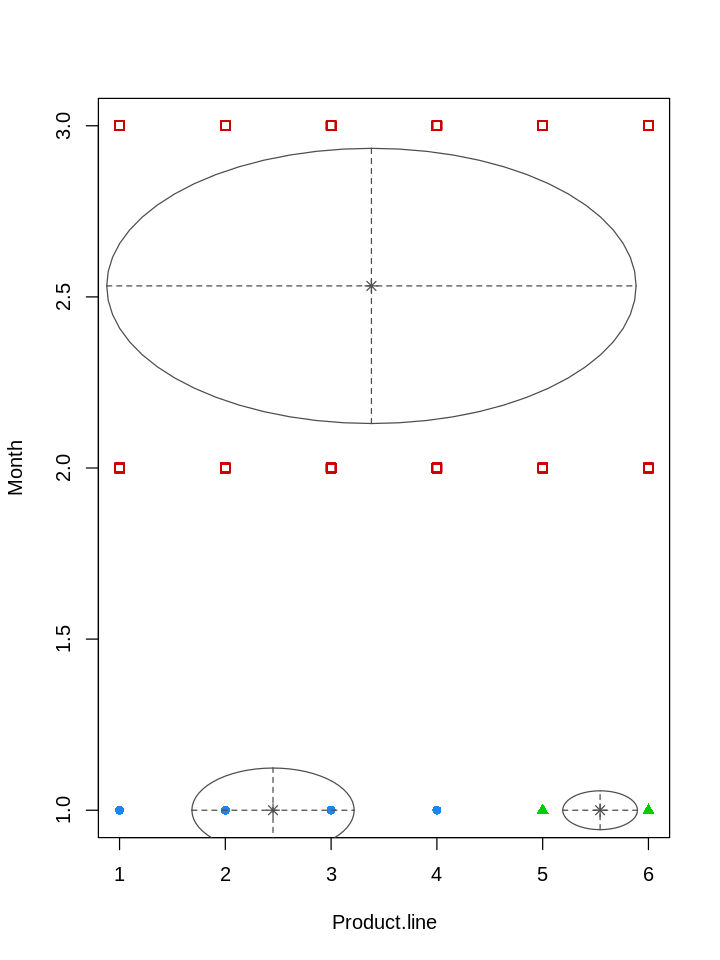

In [177]:
# plotting
plot(mod ,c("classification"))

TBH, I have no idea what this is.

### 2.3 Embedded Methods

In [148]:
library(wskm)

set.seed(2)
model <- ewkm(iris[1:4], 3, lambda=2, maxiter=1000)

In [149]:
library(cluster)

In [179]:
# cluster plots of the first two principal component analyses

clusplot(df_num[1:8], model$cluster, color=TRUE, shade=TRUE,
         labels=2, lines=1,main='Cluster Analysis for Iris')

ERROR: Error in clusplot.default(df_num[1:8], model$cluster, color = TRUE, shade = TRUE, : The clustering vector is of incorrect length


In [ ]:
# calculating the weights
round(model$weights*100,2)

### 2.4 Feature Ranking

In [180]:
library(FSelector)

ERROR: Error in library(FSelector): there is no package called ‘FSelector’


In [ ]:
# calculate the correlation coefficient
Scores <- linear.correlation(df_num)
Scores

In [ ]:
# From the output above, we observe a list containing 
# rows of variables on the left and score on the right. 
# In order to make a decision, we define a cutoff 
# i.e. suppose we want to use the top 5 representative variables, 
# through the use of the cutoff.k function included in the FSelector package. 
# Alternatively, we could define our cutoff visually 
# but in cases where there are few variables than in high dimensional datasets.
# 
# cutoff.k: The algorithms select a subset from a ranked attributes. 
# ---
#
Subset <- cutoff.k(Scores, 5)
as.data.frame(Subset)

In [ ]:
# We could also set cutoff as a percentage which would indicate 
# that we would want to work with the percentage of the best variables.
# ---
#
Subset2 <-cutoff.k.percent(Scores, 0.4)
as.data.frame(Subset2)


In [ ]:
# Instead of using the scores for the correlation coefficient, 
# we can use an entropy - based approach as shown below;
# ---
# 
Scores2 <- information.gain(medv~., Dataset)

In [ ]:
# Choosing Variables by cutoffSubset <- cutoff.k(Scores2, 5)
# ---
# 
Subset3 <- cutoff.k(Scores2, 5)
as.data.frame(Subset3)